In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler,OrdinalEncoder
from sklearn.linear_model import LinearRegression,LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("datasets/audi.csv")
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [3]:
df['transmission'] = df['transmission'].map({"Manual":0,"Semi-Auto":1,"Automatic":2})
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,0,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,2,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,0,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,2,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,0,1998,Petrol,145,49.6,1.0


In [4]:
df['transmission'].value_counts()

transmission
0    4369
1    3591
2    2708
Name: count, dtype: int64

In [5]:
df['transmission'].corr(df['price'])

0.4410521898766065

In [6]:
df['fuelType'].value_counts()

fuelType
Diesel    5577
Petrol    5063
Hybrid      28
Name: count, dtype: int64

<Figure size 800x600 with 0 Axes>

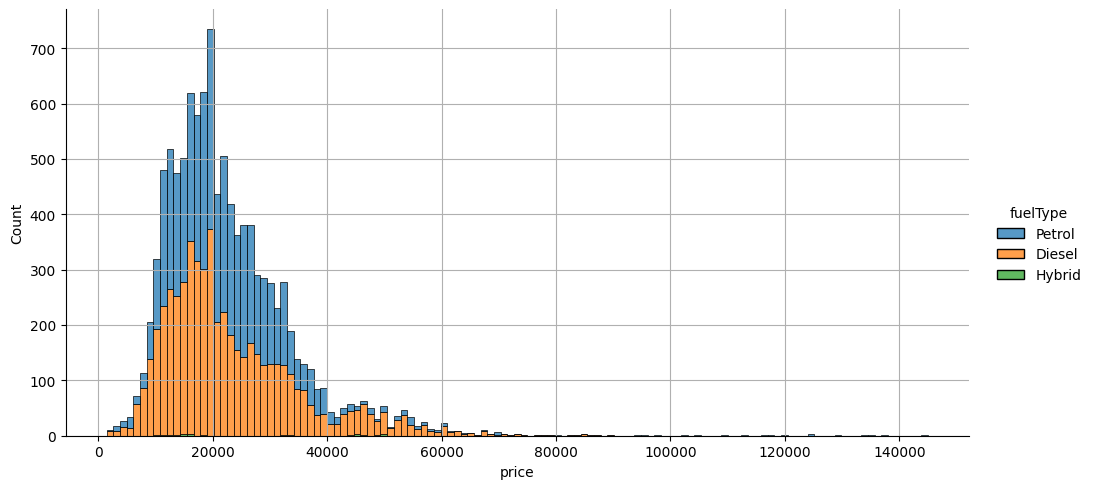

In [7]:
plt.figure(figsize=(8,6))
sns.displot(df,x=df['price'],hue='fuelType',aspect=2,multiple='stack')
plt.grid()
plt.show()

In [8]:
df['fuelType'] = df['fuelType'].map({"Diesel":1,"Petrol":2,"Hybrid":0})
df.sample()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
9294,A5,2019,31990,2,1000,1,145,46.3,2.0


In [9]:
df['price'].corr(df['fuelType'])

-0.036633266470806544

In [10]:
print(df['model'].unique())
len(df['model'].unique())

['A1' 'A6' 'A4' 'A3' 'Q3' 'Q5' 'A5' 'S4' 'Q2' 'A7' 'TT' 'Q7' 'RS6' 'RS3'
 'A8' 'Q8' 'RS4' 'RS5' 'R8' 'SQ5' 'S8' 'SQ7' 'S3' 'S5' 'A2' 'RS7']


26

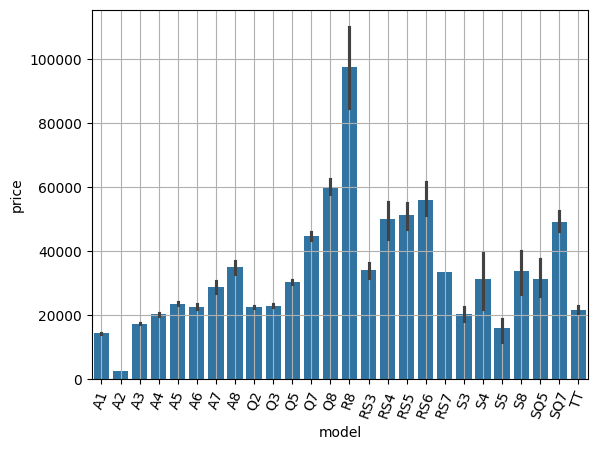

In [11]:
sns.barplot(data=df,x=df['model'].sort_index(),y=df['price'],order=df['model'].sort_values())
plt.xticks(rotation=70)
plt.grid(1)
plt.show()

In [12]:
ord = OrdinalEncoder()
df['model'] = ord.fit_transform(df[['model']])
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,0.0,2017,12500,0,15735,2,150,55.4,1.4
1,5.0,2016,16500,2,36203,1,20,64.2,2.0
2,0.0,2016,11000,0,29946,2,30,55.4,1.4
3,3.0,2017,16800,2,25952,1,145,67.3,2.0
4,2.0,2019,17300,0,1998,2,145,49.6,1.0


In [13]:
df['model'].corr(df['price'])

0.39463546915381137

In [14]:
df.tail()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
10663,2.0,2020,16999,0,4018,2,145,49.6,1.0
10664,2.0,2020,16999,0,1978,2,150,49.6,1.0
10665,2.0,2020,17199,0,609,2,150,49.6,1.0
10666,9.0,2017,19499,2,8646,2,150,47.9,1.4
10667,9.0,2016,15999,0,11855,2,150,47.9,1.4


In [15]:
df.corr()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
model,1.000000,0.056775,0.394635,0.180233,-0.068694,-0.048901,0.393301,-0.408770,0.369126
year,0.056775,1.000000,0.592581,0.227061,-0.789667,0.119869,0.093066,-0.351281,-0.031582
price,0.394635,0.592581,1.000000,0.441052,-0.535357,-0.036633,0.356157,-0.600334,0.591262
transmission,0.180233,0.227061,0.441052,1.000000,-0.180980,-0.104144,0.330969,-0.348615,0.385790
mileage,-0.068694,-0.789667,-0.535357,-0.180980,1.000000,-0.239618,-0.166547,0.395103,0.070710
fuelType,-0.048901,0.119869,-0.036633,-0.104144,-0.239618,1.000000,0.106313,-0.357648,-0.363532
tax,0.393301,0.093066,0.356157,0.330969,-0.166547,0.106313,1.000000,-0.635909,0.393075
mpg,-0.408770,-0.351281,-0.600334,-0.348615,0.395103,-0.357648,-0.635909,1.000000,-0.365621
engineSize,0.369126,-0.031582,0.591262,0.385790,0.070710,-0.363532,0.393075,-0.365621,1.000000


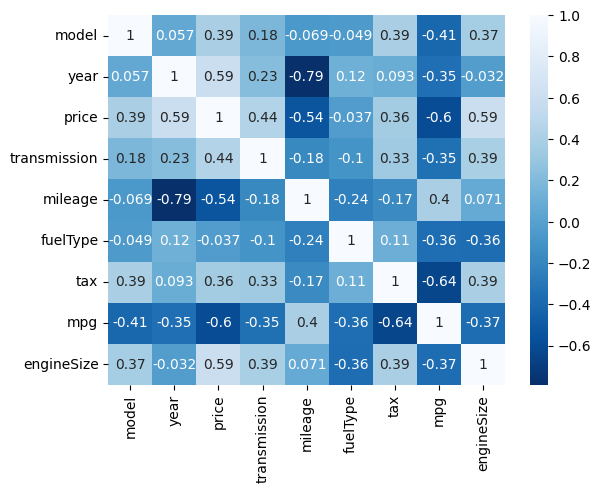

In [16]:
sns.heatmap(df.corr(),annot=True,cmap='Blues_r')
plt.show()

In [17]:
x_data = df.drop('price',axis=1)
y_data = df['price']

In [18]:
print(x_data.shape)
print(y_data.shape)

(10668, 8)
(10668,)


In [19]:
standart = StandardScaler()
x_data = standart.fit_transform(x_data)

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,test_size=0.25,random_state=42)

In [22]:
print("TRAIN DATA")
print(x_train.shape)
print(y_train.shape)

TRAIN DATA
(8001, 8)
(8001,)


In [23]:
print("TEST DATA")
print(x_test.shape)
print(y_test.shape)

TEST DATA
(2667, 8)
(2667,)


In [24]:
log_model = LogisticRegression()
log_model.fit(x_train,y_train)

LogisticRegression()

In [25]:
y_pred = log_model.predict(x_test)

In [26]:
y_pred.shape

(2667,)

In [27]:
y_pred

array([11995, 23995, 29990, ..., 30000, 12795, 43990], dtype=int64)

In [29]:
y_test = np.array(y_test)

In [30]:
f1_score(y_test,y_pred,average='binary')

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [123]:
from sklearn.svm import SVC

In [124]:
svc_model = SVC()
svc_model.fit(x_train,y_train)

SVC()

In [ ]:
y_pred = svc_model.predict(x_test)

In [ ]:
y_pred